In [1]:
from sklearn .cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris=load_iris()

In [2]:

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

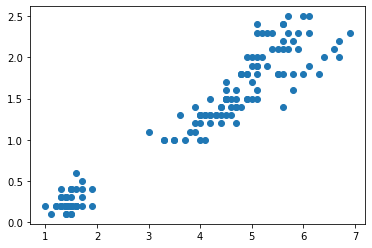

In [3]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

# Determining the best k for the plot

In [4]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

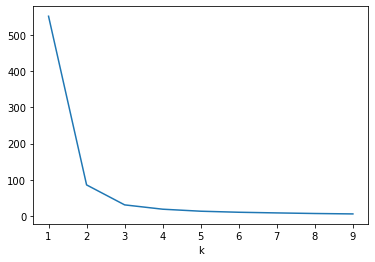

In [5]:
plt.xlabel('k')
plt.ylabel('')
plt.plot(k_rng,sse)

Elbow of plot 3.

In [6]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster']=y_predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Plotting Three Different Clusters 

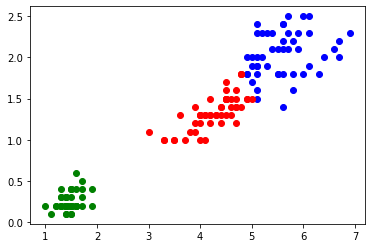

In [7]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="green")
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color="blue")
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color="red")                                         
                                         

# DETERMINING IF SCALING CAN BE USEFUL HERE

In [8]:
scalar=MinMaxScaler()
scalar.fit(df[['petal width (cm)']])
df['petal width']=scalar.transform(df[['petal width (cm)']])
scalar.fit(df[['petal length (cm)']])
df['petal length']=scalar.transform(df[['petal length (cm)']])

In [9]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length','petal width']])
df['cluster_n']=y_predicted


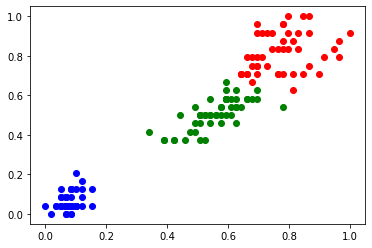

In [10]:
df1=df[df.cluster_n==0]
df2=df[df.cluster_n==1]
df3=df[df.cluster_n==2]
plt.scatter(df1['petal length'],df1['petal width'],color="green")
plt.scatter(df2['petal length'],df2['petal width'],color="blue")
plt.scatter(df3['petal length'],df3['petal width'],color="red")  

Thus it can be noted that scaling does not help much here